In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn import datasets, svm
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

### The Iris Dataset

In [2]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [3]:
X = iris_X[:, :2]

In [4]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

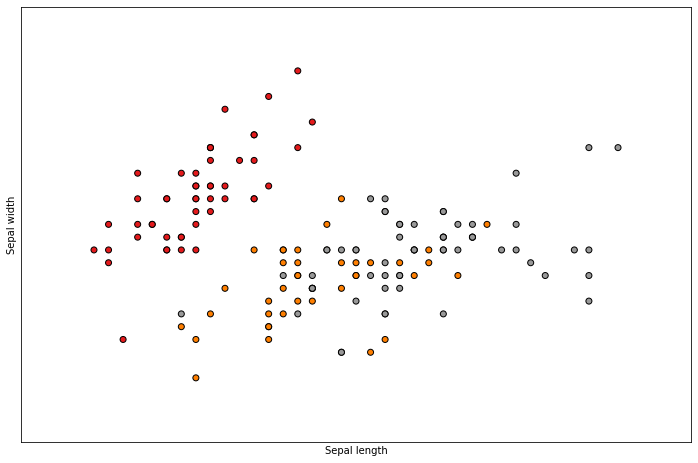

In [5]:
plt.figure(figsize=(12, 8))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=iris_y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

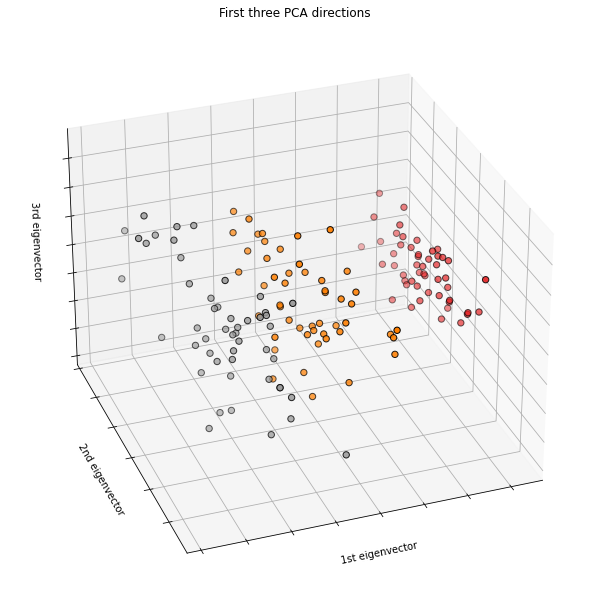

In [6]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris_X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=iris_y,
          cmap=plt.cm.Set1, edgecolor="k", s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

### Nearest Neighbors Classification

In [7]:
n_neighbors = 15

In [8]:
X = iris_X[:, :2]

In [9]:
h = 0.02  # step size in the mesh

In [10]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

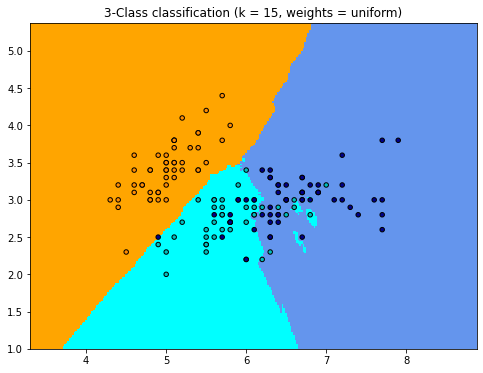

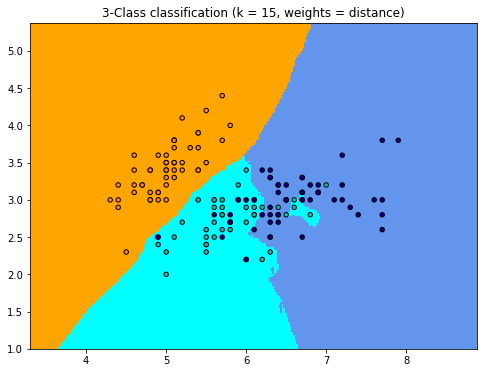

In [11]:
for weights in ["uniform", "distance"]:
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, iris_y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading="auto")
    
    plt.scatter(X[:, 0], X[:, 1], c=iris_y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {n_neighbors}, weights = {weights})")
plt.show()

### Nearest neighbor and the curse of dimensionality

In [12]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
indices

array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
        54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
        44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
        92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
        56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
        89,  91, 125,  48,  13, 111,  95,  20,  15,  52,   3, 149,  98,
         6,  68, 109,  96,  12, 102, 120, 104, 128,  46,  11, 110, 124,
        41, 148,   1, 113, 139,  42,   4, 129,  17,  38,   5,  53, 143,
       105,   0,  34,  28,  55,  75,  35,  23,  74,  31, 118,  57, 131,
        65,  32, 138,  14, 122,  19,  29, 130,  49, 136,  99,  82,  79,
       115, 145,  72,  77,  25,  81, 140, 142,  39,  58,  88,  70,  87,
        36,  21,   9, 103,  67, 117,  47])

In [13]:
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [14]:
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

In [15]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [16]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### Linear Regression Example

In [17]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape

(442, 10)

In [18]:
diabetes_X_1dim = diabetes_X[:, np.newaxis, 2]

In [19]:
diabetes_X_train = diabetes_X_1dim[:-20]
diabetes_X_test = diabetes_X_1dim[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [20]:
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [21]:
diabetes_y_pred = regr.predict(diabetes_X_test)

Coefficients: [938.23786125]
Mean squared error: 2548.0723987259703
Coefficient of determination: 0.47257544798227136


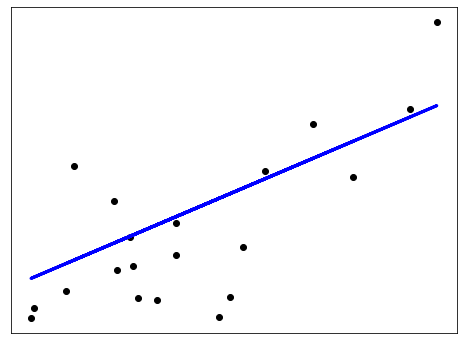

In [22]:
print("Coefficients:", regr.coef_)
print(f"Mean squared error: {mean_squared_error(diabetes_y_test, diabetes_y_pred)}")
print(f"Coefficient of determination: {r2_score(diabetes_y_test, diabetes_y_pred)}")
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

### Linear model: from regression to sparsity

In [23]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [24]:
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
regr.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [25]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898211

In [26]:
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690574

In [27]:
X = np.c_[0.5, 1].T
y = [0.5, 1]
test = np.c_[0, 2].T

In [28]:
regr = LinearRegression()

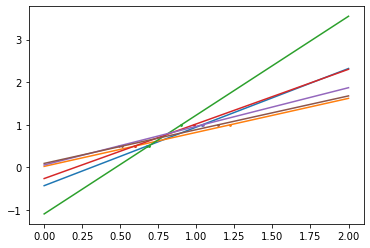

In [29]:
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = 0.1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

Shrinkage in Ridge model solves the problem of variance:

In [30]:
regr = Ridge(alpha=0.1)

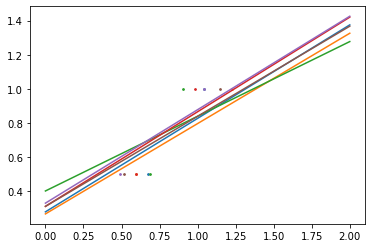

In [31]:
plt.figure()
np.random.seed(0)
for _ in range(6): 
    this_X = 0.1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3)

In [32]:
alphas = np.logspace(-4, -1, 6)

In [33]:
for alpha in alphas:
    regr = Ridge(alpha=alpha)
    regr.fit(diabetes_X_train, diabetes_y_train)
    print(regr.score(diabetes_X_test, diabetes_y_test))

0.585111068388353
0.5852073015444677
0.585467754069849
0.5855512036503915
0.5830717085554162
0.5705899943728011


Sparcity Example: Fitting only features 1 and 2

In [34]:
diabetes_X_train = diabetes_X[:-20, :2]
diabetes_X_test = diabetes_X[-20:, :2]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [35]:
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [36]:
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(8, 6))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(X_train[:, 0], X_train[:, 1], diabetes_y_train, c='k', marker='+')
    ax.plot_surface(np.array([[-0.1, -0.1], [0.15, 0.15]]),
                    np.array([[-0.1, 0.15], [-0.1, 0.15]]),
                    clf.predict(np.array([[-0.1, -0.1, 0.15, 0.15], [-0.1, 0.15, -0.1, 0.15]]).T).reshape((2, 2)),
                    alpha=0.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

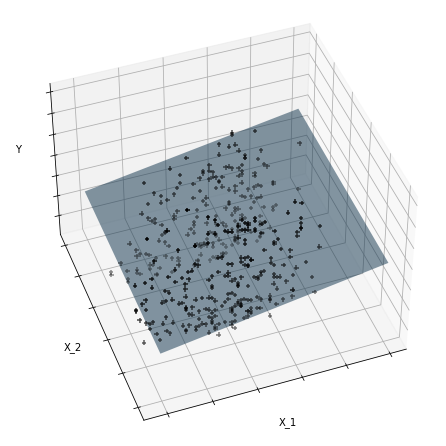

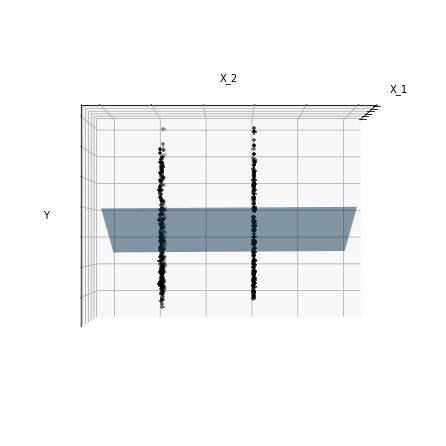

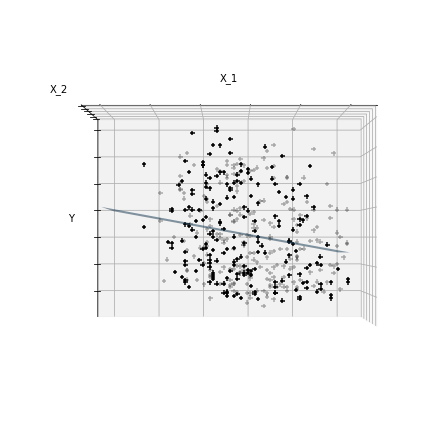

In [37]:
elev = 43.5
azim = -110
plot_figs(1, elev, azim, diabetes_X_train, regr)

elev = -.5
azim = 0
plot_figs(2, elev, azim, diabetes_X_train, regr)

elev = -.5
azim = 90
plot_figs(3, elev, azim, diabetes_X_train, regr)

plt.show()

In [38]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

scores = []
for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(diabetes_X_train, diabetes_y_train)
    scores.append(regr.score(diabetes_X_test, diabetes_y_test))

In [39]:
scores

[0.5851191069162227,
 0.5852471364906049,
 0.5857189539179355,
 0.587300948545274,
 0.5887622418309261,
 0.5828450029681681]

In [40]:
best_alpha = alphas[scores.index(max(scores))]

In [41]:
regr = Lasso(alpha=best_alpha)
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794)

In [42]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


Classification:

In [43]:
X = iris_X[:, :2]
log = LogisticRegression(C=1e5)
log.fit(X, iris_y)

LogisticRegression(C=100000.0)

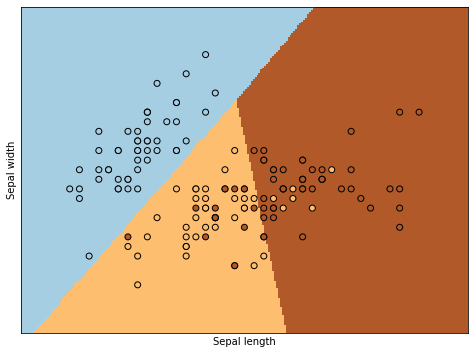

In [44]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading="auto")

plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Parameter (alpha or C) controls the amout of regularization: a large value for C (smaller for alpha in Ridge or Lasso) results in less regularization. Penalty "L2" gives Shrinkage (i. e. non-sparse coefficients), while penalty "L1" gives Sparsity.

### Linear SVMs

In [45]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

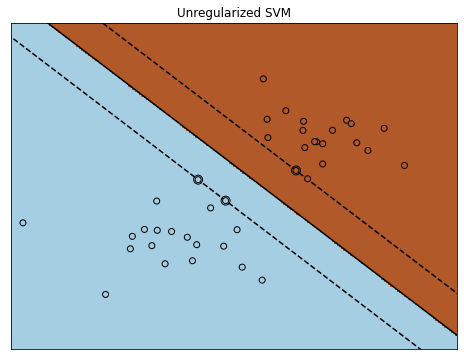

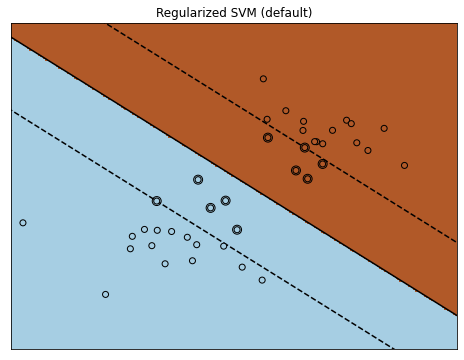

In [46]:
fignum = 1

for name, penalty in (("Unregularized SVM", 1), ("Regularized SVM (default)", 0.05)):
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)
    
     # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    
    plt.figure(fignum, figsize=(8, 6))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired, shading="auto")

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    fignum = fignum + 1
    
plt.show()

### SVM-Kernels

In [47]:
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

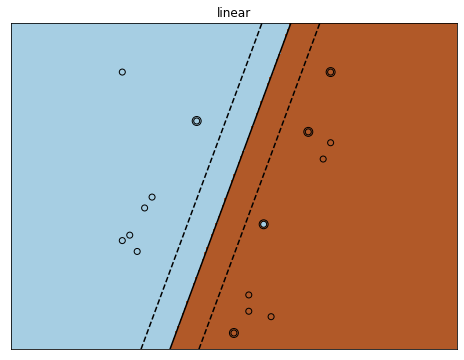

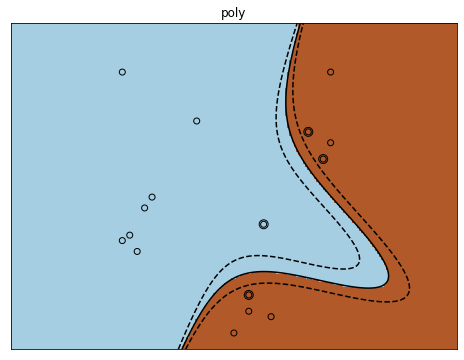

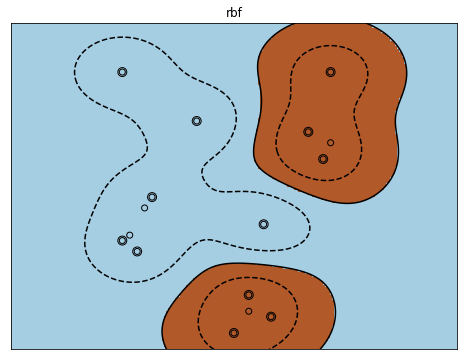

In [48]:
fignum = 1

for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    plt.figure(fignum, figsize=(8, 6))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="Auto")
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title(kernel)
    fignum = fignum + 1

plt.show()

### Different SVM classifiers in the iris dataset

In [49]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [50]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [51]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [52]:
C = 1.0
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [53]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

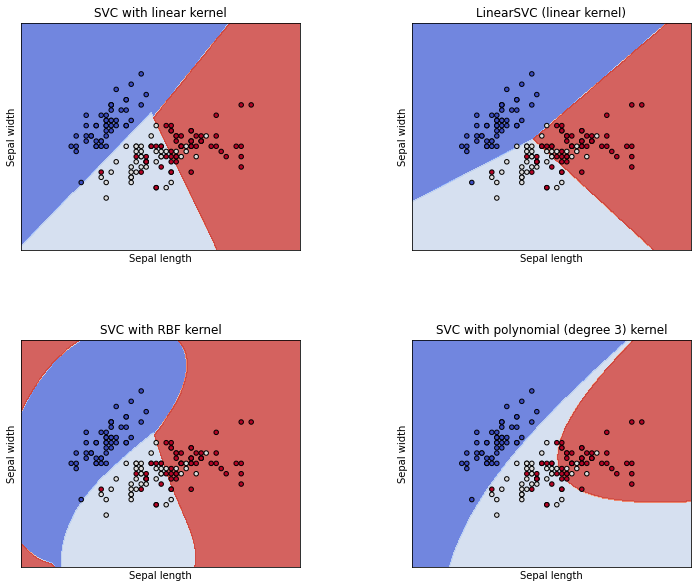

In [54]:
fig, sub = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()